<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


In [ ]:
plt.rcParams['figure.figsize'] = (7,7) 

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


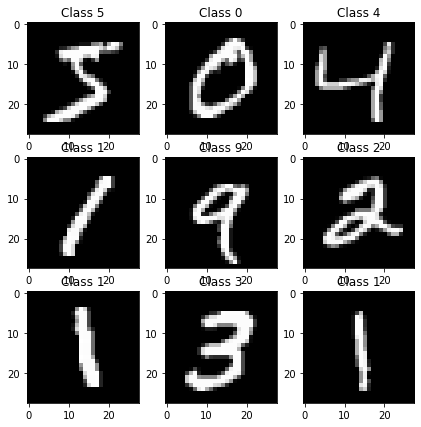

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

**Splitting on train and test datasets**

Reshaping the input so that each 28x28 image becomes a single 784 dimensional vector. 
Scaling the inputs to be in the range 0...1

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
                                                       
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

Dropout helps protect the model from memorizing or "overfitting" the training data

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 21s 38ms/step - loss: 0.2511 - accuracy: 0.9227 - val_loss: 0.1108 - val_accuracy: 0.9646
Epoch 2/4
469/469 [==============================] - 11s 23ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.0756 - val_accuracy: 0.9763
Epoch 3/4
469/469 [==============================] - 11s 25ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0732 - val_accuracy: 0.9778
Epoch 4/4
469/469 [==============================] - 11s 23ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0725 - val_accuracy: 0.9782


In [ ]:
score = model.evaluate(X_test, Y_test,
                      batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 7ms/step - loss: 0.0725 - accuracy: 0.9782
Test loss: 0.07251487672328949
Test accuracy: 0.9782000184059143


In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
correct_pred = np.nonzero(classes_x == y_test)[0]
incorrect_pred = np.nonzero(classes_x != y_test)[0]

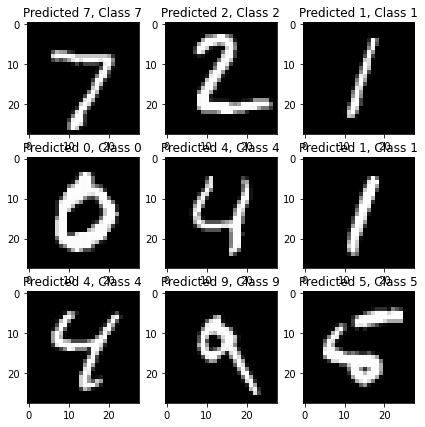

In [ ]:
plt.figure()
for i, correct in enumerate(correct_pred[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_test[correct]))
    

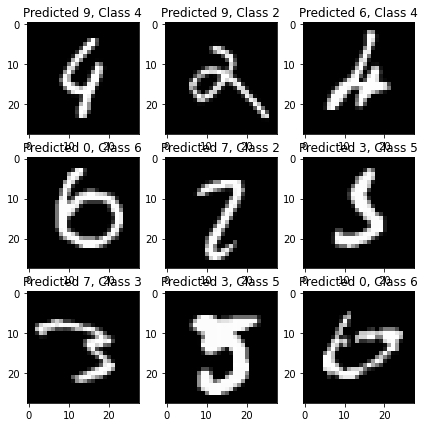

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_pred[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_test[incorrect]))

**Conclusion**

To build a neural network 3 Dense  were used, activation functions 'relu' and 'softmax', and Dropout to avoid overfitting